In [372]:
import numpy as np

class DP_LR:
    def __init__(self, epsilon, learning_rate, num_epochs):
        self.epsilon = epsilon
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.weights = None

    def sigmoid(self, x):
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))

    def gamma(self, data, epsilon):
        sensitivity = 1 
        beta = sensitivity / epsilon
        noise = np.random.gamma(data.shape, beta,data.shape)
        return noise
    

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        for k in range(self.num_epochs):
            error = self.sigmoid(np.dot(X, self.weights)) - y
            gradient = np.dot(X.T, error )
            noisy_gradient = gradient + self.gamma(gradient, self.epsilon)
            self.weights -= self.learning_rate * noisy_gradient

    def predict(self, X):
        if self.weights is None:
            raise Exception("Model not trained yet. Call fit() first.")
        return np.round(self.sigmoid(np.dot(X, self.weights)))




In [373]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [374]:
# Generating synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [375]:
model = DP_LR(epsilon=0.01, learning_rate=0.1, num_epochs=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Predictions:", y_pred)

Predictions: [1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1.]


In [376]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.495


In [377]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
# Make predictions
y_pred2 = logistic_reg.predict(X_test)

In [378]:
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy2)

Accuracy: 0.855


In [385]:
eps = np.logspace(-2, 2, 500)
eps_1=[0.01,0.1,0.2,0.3,0.4,0.5,1,2,3,4,5]
acc_1=[]
for i in eps:
    model = DP_LR(epsilon=i, learning_rate=0.1, num_epochs=1000)
    model.fit(X_train, y_train)
    y_p = model.predict(X_test)
    acc_1.append(accuracy_score(y_test, y_p))
    


In [390]:
acc_2=[]
for i in eps_1:
    model = DP_LR(epsilon=i, learning_rate=0.1, num_epochs=1000)
    model.fit(X_train, y_train)
    y_p = model.predict(X_test)
    acc_2.append(accuracy_score(y_test, y_p))

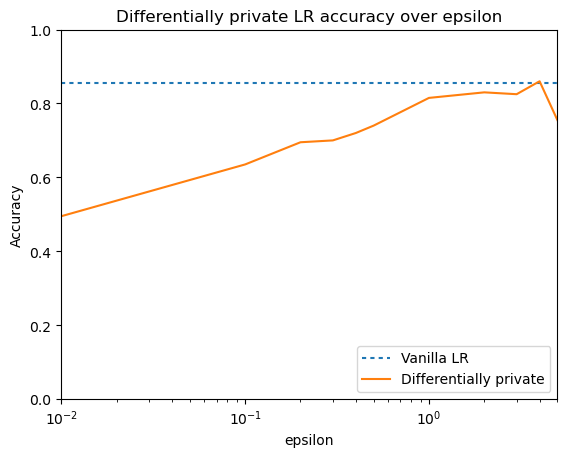

In [391]:
import matplotlib.pyplot as plt
plt.semilogx(eps_1, np.ones_like(eps_1) * accuracy2, dashes=[2,2], label="Vanilla LR")
plt.plot(eps_1, acc_2, label="Differentially private")
plt.title("Differentially private LR accuracy over epsilon")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xlim(eps_1[0], eps_1[-1])
plt.legend(loc=4)
plt.show()

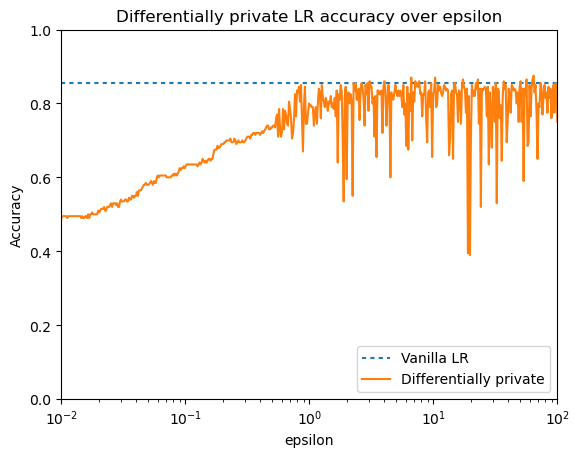

In [381]:
import matplotlib.pyplot as plt
plt.semilogx(eps, np.ones_like(eps) * accuracy2, dashes=[2,2], label="Vanilla LR")
plt.plot(eps, acc_1, label="Differentially private")
plt.title("Differentially private LR accuracy over epsilon")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xlim(eps[0], eps[-1])
plt.legend(loc=4)
plt.show()